In [23]:
import json
import os

OUTPUT_FILE = os.path.join('/tmp', 'output.txt')

def load(filename):
    return {"test": 123, 'source': filename}

def clean(data):
    return data

def analyze(sequence_of_data):
    return sequence_of_data

def store(results, outputfile=OUTPUT_FILE):
    with open(outputfile, 'w') as f:
        json.dump(results, f)
#         for result in results:
#             f.write(str(result))

dsk = {
    'load-1': (load, 'myfile.a.data'),
    'load-2': (load, 'myfile.b.data'),
    'load-3': (load, 'myfile.c.data'),
    'clean-1': (clean, 'load-1'),
    'clean-2': (clean, 'load-2'),
    'clean-3': (clean, 'load-3'),
    'analyze': (analyze, ['clean-%d' % i for i in [1, 2, 3]]),
    'store': (store, 'analyze')
}


In [17]:
from dask.threaded import get
get(dsk, 'store')  # executes in parallel

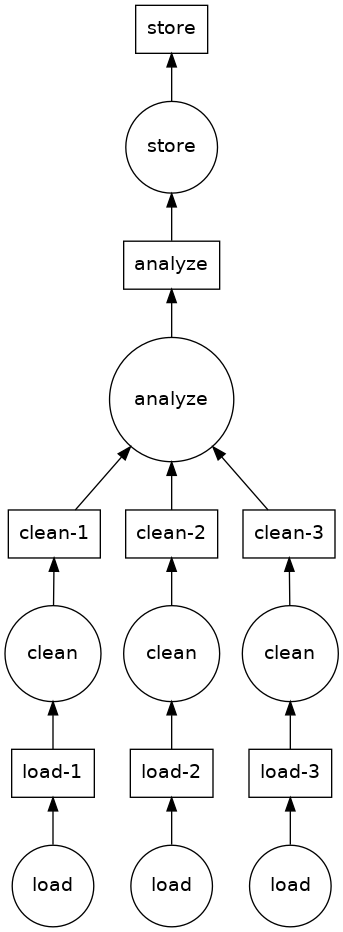

In [18]:
import dask
from dask.delayed import Delayed

delayed_dsk = Delayed("w", dsk)
dask.visualize(delayed_dsk, verbose=True)

In [19]:
with open(OUTPUT_FILE) as f:
    print(f.read())

[{"test": 123, "source": "myfile.a.data"}, {"test": 123, "source": "myfile.b.data"}, {"test": 123, "source": "myfile.c.data"}]


In [ ]:
## Example of 

In [34]:
from dask.utils import apply
alternative_graph = {
    'load-1': (apply, load, {'filename':'myfile.a.data'}),
    'load-2': (apply, load, {'filename':'myfile.b.data'}),
    'load-3': (apply, load, {'filename':'myfile.a.data'}),
    'clean-1': (clean, 'load-1'),
    'clean-2': (clean, 'load-2'),
    'clean-3': (clean, 'load-3'),
    'analyze': (analyze, ['clean-%d' % i for i in [1, 2, 3]]),
    'store': (store, 'analyze', '/tmp/alternative_output.txt')
}

In [35]:
get(alternative_graph, 'store')  # executes in parallel